# 7. Theoretical question

#### 1. Try solving the problem mentioned above using three different sorting algorithms (do not use any MapReduce algorithm). (Note: Built-in Python functions (like .mean, .sort, etc.) are not allowed to be used. You must implement the algorithms from scratch).

In [1]:
#let's import the only library we'll need that is time and we'll use it to evaluate the time taken by the algorithm
import time

### Se va bene poi inseriamo queste 4 funzioni più quelle di ordinamento in un file da importare

In the next blocks there are some useful functions that we'll use for answering question 7.1:
- **my_mean** : it is a function that given a row of the file ApplicantsInfo.txt returns the average of the m scores in that row;
- **sort_by_name** : it is a function that, given two words (name2, name1), if name2 in alphabetical order is before name1 it returns 1, otherwise 0;
- **read_file** : it is a function that reads the file ApplicantsInfo.txt and return a list with all the informations we need;
- **print_file** : it is a function that contains the code to write a .text file with the sorted list.

In [12]:
def my_mean(l,m): 
    mean=0
    for i in range(2,len(l)):
        mean += int(l[i])
    mean = mean/m
    return mean

In [13]:
def sort_by_name(name2,name1):

    for i in range(min(len(name1),len(name2))):
        # for loop stops as soon as the first word finishes the characters
        if name2[i]<name1[i]:
            return 1
        elif name2[i]>name1[i]:
            return 0

    # at this point if the for loop ended without returning any value this mean that the shortest word is equal to the first part of 
    # the other word and so we'll return 0 or 1 depending on the lengths of the words 
    if len(name1)<len(name2):
        return 0
    else:
        return 1

In [14]:
def read_file():
    f = open("C://Users//auror//Desktop//data_science//ADM//HM//3//ApplicantsInfo.txt","r")
    dati=[]

    # first we read the first row and we store in n the number of students and in m the number of scores for each student
    n, m = map(int,f.readline().split()) 

    #starting from the second row, with the while loop we read 1 row at time and the while loop ends when there isn't anymore rows to be read 
    j = 1
    while True:
        # dati_temp will be a list s.t. in the first two positions there are 'name' and 'surname' of a student and starting from position 3 till
        # the last we have all of his/her scores (m in total)
        dati_temp = f.readline().split()
        if not dati_temp:
            break
        # then we call the function my_mean in order to compute the mean of the scores of a given student  and then we'll append to the list 'dati'
        # a list done like this [name,surname,mean of the scores]
        mean = my_mean(dati_temp,m)
        dati.append([dati_temp[0],dati_temp[1],round(mean,2)])
    f.close()
    return dati, n, m

In [30]:
def print_file(dati):
    f= open("RankingList_insertion.txt","w")
    # for each 3-elements list i in dati we print in a row i[0] (name), i[1] (surname) and i[2] (avarage)
    for i in dati:
        f.write(i[0]+" "+i[1]+" "+str(i[2]))
        f.write("\n")
    f.close()
    return

The next 3 blocks contains the code to compute each of the sorting algorithm.  

#### Insertion sort

In [31]:
#run this cell to compute insertion sort algorithm
dati,n,m = read_file()
start_time = time.time()
insertion_sort(n)
end_time = time.time()
minuti = (end_time-start_time)//60
secondi = (end_time-start_time)%60
print_file(dati)
print('The time taken for computing insertion_sort is: ',minuti,'minutes and',round(secondi,2),'seconds')

The time taken for computing insertion_sort is:  5.0 minutes and 46.83 seconds


#### Merge sort

In [24]:
##run this cell tu compute merge sort algorithm
dati,n,m = read_file()
start_time = time.time()
merge_sort(1,n)
end_time = time.time()
minuti = (end_time-start_time)//60
secondi = (end_time-start_time)%60
print_file(dati)
print('The time taken for computing merge sort is: ',minuti,'minutes and',round(secondi,2),'seconds')

The time taken for computing merge sort is:  0.0 minutes and 0.77 seconds


#### Quick sort

In [29]:
##run this cell tu compute quick sort algorithm
dati,n,m = read_file()
start_time = time.time()
quicksort(0,n-1)
end_time = time.time()
minuti = (end_time-start_time)//60
secondi = (end_time-start_time)%60
print_file(dati)
print('The time taken for computing quick sort is: ',minuti,'minutes and',round(secondi,2),'seconds')

The time taken for computing quick sort is:  0.0 minutes and 40.81 seconds


The next block contains the function insertion_sort

In [18]:
#insertion sort
def insertion_sort(n):
    # the for loop starts from the second element of the list dati since we suppose that the first element is already in the right position
    for i in range(1,int(n)):
        # starting from the element i-1 we go backwords in the list as soon as we found an element j such that dati[j][2]<dati[i][2] or 
        # dati[j][2]=dati[i][2] but in alphabetical order the name and surname of the element j have to be before the element i 
        while ((dati[i][2]>=dati[i-1][2]) & (i>0)):
            # everytime if dati[i][2]>dati[i-1][2] we exchange the two lists (dati[i] and dati[i-1])
            if dati[i][2]>dati[i-1][2]:
                temp=dati[i-1]
                dati[i-1]=dati[i]
                dati[i]=temp
                # after exchanging element i and element i-1 we point to the element before i and skip the rest of the while since we know that 
                # the avarages were not equal
                i -= 1
                continue
            # if dati[i][2]=dati[i-1][2] then we check the alphabetical order of the two lists
            elif dati[i][2]==dati[i-1][2]:
                # if the names of element i and element i-1 are equal we call the function sort_by_name with their surnames
                if dati[i][0]==dati[i-1][0]:
                    y_n = sort_by_name(dati[i][1],dati[i-1][1])
                #instead if the names are not equal we call the function sort_by_name with the names of element i and i-1
                elif dati[i][0]!=dati[i-1][0]:
                    y_n = sort_by_name(dati[i][0],dati[i-1][0])
                # if y_n=1 this mean that name and surname of dati[i] in alphabetical order have to be before dati[i-1] and so we exchange the 
                # two lists 
                if y_n:
                    temp=dati[i-1]
                    dati[i-1]=dati[i]
                    dati[i]=temp
                    i -= 1
                # otherwise, if element i and i-1 were already in alphabetical order this mean that the element i was already in the right
                # position and so we break the while 
                else:
                    break
    return

The next two blocks contains the merge_sort function and the merge function used in the first one.

In [22]:
def merge_sort(start,end):
    # the recursion stops when start=end
    if start<end:
        # in this case we call recoursively the function merge_sort itself in the two sublists with indixes [start:medium] and
        # [medium+1:start]
        medium = (start+end)//2
        merge_sort(start,medium)
        merge_sort(medium+1,end)
        # then we call the function merge that, given the fact that the two sublists [start:medium] and [medium+1:end] are 
        # sorted, will sort the whole list [start:end] comparing the elements of the two sublists 
        merge(start,medium,end)
    return

In [23]:
def merge(start,medium,end):
    # we need to create a local list in which we can store the sorted elements of the two sublists
    B = []
    # since when we call the function merge_sort for the first time we give to it start=1 and end=n, we now need to fix indexes
    # since, as we know, in python the start index of a list is 0 and the last index is len(list)-1 (=n-1) 
    i = start-1
    j = medium
    
    # i will be the index that point to elements of the left sublist and j the one that point to elements of the right sublist
    while ((i<medium) and (j<end)):
        # now we compare the average of the elements i and j and we'll append to our local list B the one that is greater
        # or, if they're equal, we'll append the one that has a name/surname that should be before the other in alphabetical order
        # Depending on which elements we've added we can after point to the next element of the first or the second sublist
        if dati[i][2]<dati[j][2]:
            B.append(dati[j])
            j+=1
        elif dati[i][2]>dati[j][2]:
            B.append(dati[i])
            i+=1
        elif dati[i][2]==dati[j][2]:
            if dati[i][0]==dati[j][0]:
                y_n = sort_by_name(dati[i][1],dati[j][1])
            elif dati[i][0]!=dati[j][0]:
                y_n = sort_by_name(dati[i][0],dati[j][0])
            if y_n==1:
                B.append(dati[i])
                i+=1
            elif y_n==0:
                B.append(dati[j])
                j+=1
        k+=1
    # after the previous while we'll have a sublist such that all its elements have been copied in the list B and the other one
    # such that we have still some elements of it that have to be copied
    
    while i<medium:
        B.append(dati[i])
        i+=1
        k+=1
    while j<end:
        B.append(dati[j])
        j+=1
        k+=1
    
    # at this point in the list B we have all the elements [start:end] of the original list sorted and so we can substitute
    # dati[start:end] with B
    if B !=[]:
        for l in range(0,end-start+1):
            dati[start-1+l]=B[l]
    return 

The next two blocks contains the quicksort function and the partition function used in the first one.

In [28]:
def quicksort(start,end):
    if start < end:
        pivot = partition(start,end)
        quicksort(start,pivot)
        quicksort(pivot+1,end)
    return

In [27]:
def partition(start,end):
    p = dati[start][2]
    i = start
    j = end
    while True:
        while dati[j][2] < p :
            j -=1 
        while dati[i][2] > p :
            i +=1 
        if i<j:
            if dati[i][2]!=dati[j][2]:
                app = dati[i]
                dati[i] = dati[j]
                dati[j] = app
            elif dati[i][2]==dati[j][2]:
                if dati[i][0]==dati[j][0]:
                    y_n = sort_by_name(dati[i][1],dati[j][1])
                elif dati[i][0]!=dati[j][0]:
                    y_n = sort_by_name(dati[i][0],dati[j][0])
                if y_n==1:
                    j -= 1
                elif y_n==0:
                    app = dati[i]
                    dati[i] = dati[j]
                    dati[j] = app
        else:
            break
    return j
            



**solo una prova per vedere se gli output dei vari algoritmi coincidono**

In [32]:
f1 = open("RankingList_merge.txt","r")
f2 = open("RankingList_insertion.txt","r")
f3 = open("RankingList_quicksort.txt")

for i in range(1,n+1):
    l1 = f1.readline()
    l2 = f2.readline()
    l3 = f3.readline()
    if l1 != l2 or l2 != l3 or l1 != l3:
        print('la vita fa schifo')
        break
    
    
print('la vita è bella',i)
f1.close()
f2.close()
f3.close()

la vita è bella 50000


#### 2. What is the time complexity of each algorithm you have used?

Let's start saying that there exists a theorem which asserts that every sorting algorithm, that works comparing the elements that should be sorted, has at least a computational cost of $n\dot log(n)$, where $n$ is the size of the list.   
For this question we've decided to use insertion that is probably one of the simplest sorting algorithm but isn't known for being the most optimal one. In fact since for every element of the list we should at most compare it with all the other previous element in the list, we can even have, in the worst case, a computational cost of $n^2$.   
Then we've used merge sort algorithm that it's known to have a time complexity of $nlog(n)$ even in the worst case.  
The last one is the quicksort that on average works with a computational cost of $nlog(n)$ but there are some cases in which it could have a cost of $n^2$.

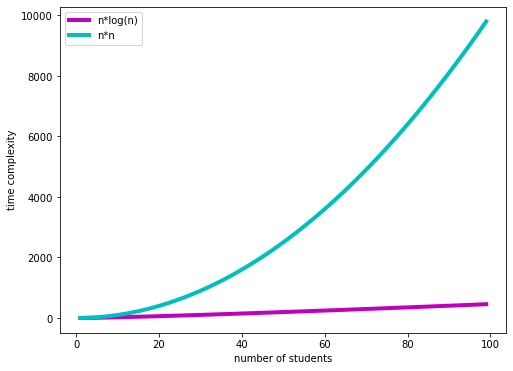

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math

X = np.arange(1,100)
y = np.log(X)*X
z = X*X
plt.figure(figsize=(8, 6))
plt.plot(X, y, color='m', label='n*log(n)', linewidth=4.0)
plt.plot(X, z, color='c', label='n*n',linewidth=4.0)
plt.xlabel("number of students")
plt.ylabel("time complexity")
plt.legend()
plt.show()

In the previous plot there are the functions $nlog(n)$ and $n^2$ where n is the number of students.    
We've decided to show this plot in order to let you visualize the great gap that we have between the two functions when $n$ is large. In particular we can notice that the more n grows the more the gap increases.    
We can assert that if we have to sort a lot of elements is always better to use an algorithm that has a computational time of $nlog(n)$.

#### 3. Evaluate the time taken for each of your implementations to answer the query stored in the ApplicantsInfo.txt file and visualize them.

As we've seen before the times taken by the different algorithm are:
- **insertion sort**: 7.0 minutes and 40.54 seconds
- **merge sort**: 0.0 minutes and 0.96 seconds
- **quick sort**: 0.0 minutes and 44.82 seconds

#### 4. What is the most optimal algorithm, in your opinion, and why?

If we have to take a decision considering only the execution time of the algorithm we may say that the merge sort is the best one since it's the faster one.  
But even quick sort when we are not in particular case is a good one because it has a plus over merge sort.   
In fact even if merge sort is very fast we can notice that in the function merge we can't reorder the list without creating a new list in which store temporarily the new sorted elements and so we use more memory. Instead in the quick sort we can sort all the elements in loco.   
For this reason if we are in the cases in which quick sort takes a time complexity of $nlog(n)$ it's the best one to use.

#### 5. Implement a sorting algorithm using MapReduce and compare it against the three algorithms previously implemented using the ApplicantsInfo.txt file.